<a href="https://colab.research.google.com/github/SPARSH-JAIN-10/House_Price_Prediction/blob/main/Housing_Price_Predication_Project_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [ ]:
data=pd.read_csv("drive/MyDrive/SHARE TO SPARSH/HOUSE PRICE PREDICTION USING ML/After_EDA.csv",index_col=0)
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2.0,renovationCondition_3.0,renovationCondition_4.0,buildingStructure_2.0,buildingStructure_3.0,buildingStructure_4.0,buildingStructure_5.0,buildingStructure_6.0,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1,2005.0,0.217,0.0,1.0,56021.0,26.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2,2004.0,0.667,1.0,0.0,71539.0,22.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3,2005.0,0.500,0.0,0.0,48160.0,4.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1,2008.0,0.273,0.0,0.0,51238.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1,1960.0,0.333,1.0,1.0,62588.0,6.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Let's Findout the outlier in a dataset using Inter quartile Range(IQR)

<Axes: ylabel='totalPrice'>

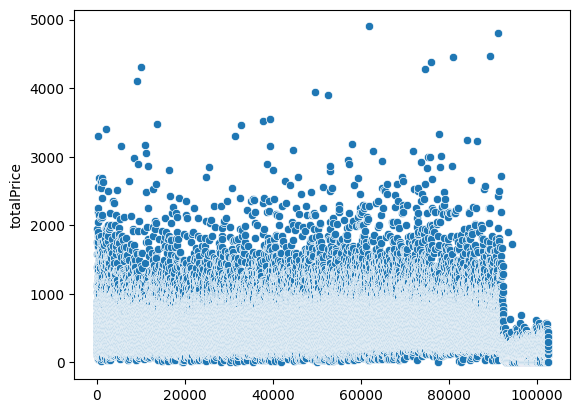

In [ ]:
sns.scatterplot(data=data['totalPrice'])

so,from the above figure we can notice that we have an outlier present in our dataset.

In [ ]:
data['totalPrice'].describe()

count    98749.000000
mean       456.757641
std        270.145083
min          0.100000
25%        287.000000
50%        400.000000
75%        551.000000
max       4900.000000
Name: totalPrice, dtype: float64

In [ ]:
#Another method to findout q1, q2 and q3
data.totalPrice.quantile([0.25,0.50,0.75])

0.25    287.0
0.50    400.0
0.75    551.0
Name: totalPrice, dtype: float64

so,we got

Q1=205 and
Q3=428

so,let's findout IQR

In [ ]:
Q1=205
Q3=428
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 223


In [ ]:
#Let's Calculate the High and Low Value in a totalPrice Features
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 762.5
Low value of our totalPrice Features is -129.5


In [ ]:
df=data.copy()

In [ ]:
#Let's remove the outlier
df=df[df['totalPrice']<=High]
df=df[df['totalPrice']>=Low]

<Axes: ylabel='totalPrice'>

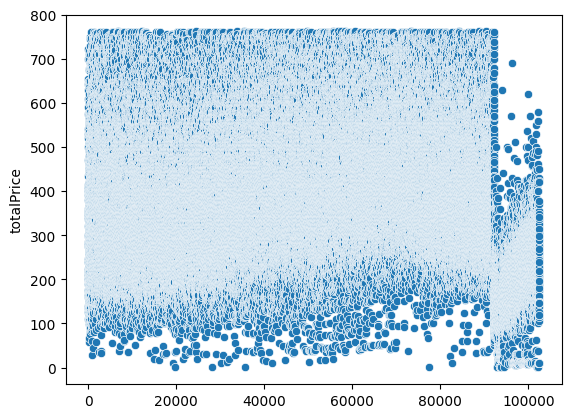

In [ ]:
sns.scatterplot(data=df['totalPrice'])

In [ ]:
print(data.shape)
print(df.shape)

(98749, 45)
(89060, 45)


In [ ]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = 9689


#### Let's Findout important features for out model

In [ ]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2.0', 'renovationCondition_3.0',
       'renovationCondition_4.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'buildingStructure_6.0', 'buildingType_2.0',
       'buildingType_3.0', 'buildingType_4.0', 'district_2.0', 'district_3.0',
       'district_4.0', 'district_5.0', 'district_6.0', 'district_7.0',
       'district_8.0', 'district_9.0', 'district_10.0', 'district_11.0',
       'district_12.0', 'district_13.0', 'elevator_1.0', 'floor_type_低',
       'floor_type_底', 'floor_type_未知', 'floor_type_顶', 'floor_type_高'],
      dtype='object')

In [ ]:
X=df.drop(['totalPrice'],axis=1)
y=df['totalPrice']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[1.23193785e-02 1.59417707e-02 1.23312508e-01 1.13323361e-02
 2.02617614e-01 8.00079659e-02 2.57174509e-02 3.20638037e-03
 2.50348043e-02 1.53755904e-02 8.73456635e-03 5.39730569e-03
 5.37883977e-03 2.71985517e-01 6.68401244e-03 1.50449667e-03
 1.16348251e-02 2.38358215e-02 1.73192652e-03 6.38136781e-06
 8.83384052e-04 5.61321060e-05 5.98509294e-03 3.06393768e-06
 2.63006183e-03 2.60435047e-03 1.68548135e-03 1.13663172e-03
 1.81567522e-03 3.45000747e-03 6.34082746e-02 4.84608159e-03
 6.56894701e-03 5.83539306e-04 1.28425728e-02 9.61977810e-04
 1.26885063e-03 1.18471251e-03 2.14783964e-02 3.89292081e-03
 3.21636813e-03 3.86387736e-05 3.51825061e-03 4.18109662e-03]


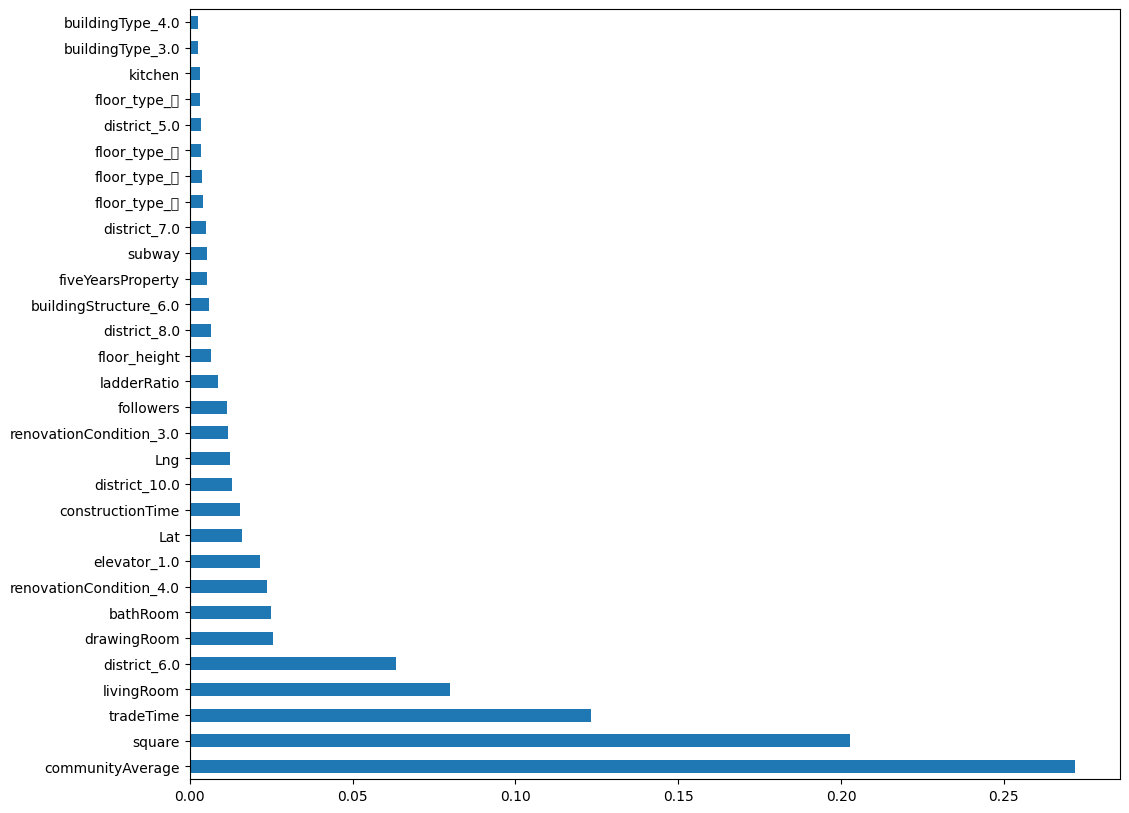

In [ ]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

So,these are the top 20 features for our model

so,for now let's notedown top 20 features for model

1> tradeTime

2> CommunityAverage

3> square

4> livingRoom

5> bathRoom

6> drawingRoom

7> renovationCondition

8> buildingStructure

9> elevator

10> constructionTime

11> Followers


### Data Normalization
Normalization (min-max Normalization)

In this approach we scale down the feature in  between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling=MinMaxScaler()

In [ ]:
col_for_normalization=['Lng', 'Lat','followers','square','livingRoom', 'drawingRoom',
                       'kitchen', 'bathRoom','ladderRatio', 'fiveYearsProperty',
                       'subway', 'communityAverage','floor_height']

In [ ]:
df[col_for_normalization]=scaling.fit_transform(df[col_for_normalization])

In [ ]:
df.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2.0,renovationCondition_3.0,renovationCondition_4.0,buildingStructure_2.0,buildingStructure_3.0,buildingStructure_4.0,buildingStructure_5.0,buildingStructure_6.0,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,0.630809,0.627253,2016,0.092738,415.0,0.302558,0.285714,0.25,0.333333,0.166667,2005.0,2.028094e-08,0.0,1.0,0.297667,0.609756,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0.597040,0.406733,2016,0.110236,575.0,0.306029,0.285714,0.50,0.333333,0.333333,2004.0,6.523868e-08,1.0,0.0,0.409653,0.512195,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0.572140,0.717698,2016,0.120735,297.5,0.310103,0.428571,0.25,0.333333,0.166667,2008.0,2.587568e-08,0.0,0.0,0.263150,0.487805,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0.557084,0.414236,2016,0.250219,392.0,0.176806,0.285714,0.25,0.333333,0.166667,1960.0,3.187004e-08,1.0,1.0,0.345058,0.121951,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.616393,0.582255,2016,0.049869,275.6,0.106386,0.142857,0.00,0.333333,0.166667,2005.0,3.187004e-08,1.0,0.0,0.382223,0.170732,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.to_csv("Data_For_Model.csv")